# AUDIO PRE PROCESSING

# Basic Representations

As the repository name suggests, we will be using CNNs for speech emotion detection. One might think that CNNs are primarily used for image processing in deep learning, but how can they be applied to classify speech (audio)? The answer is that we convert audio into images. For this, we will use a library called Librosa.

Waveform: It's the same aplitude v/s time curve we learnt in schools

In [21]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import IPython.display as ipd

In [22]:
audio_data,sr = librosa.load('./water_splash.mp3')

audio_data is a numPy array containing amplitude samples, and sr is the sample rate, which represents how many amplitude samples occur in one second.

duration = len(audio_data)/sr

In [23]:
ipd.Audio(audio_data,rate=sr)

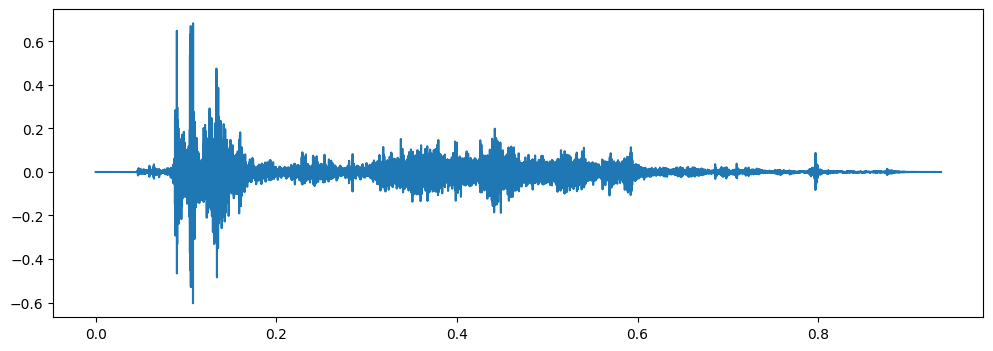

In [24]:
#aplitude v/s time plot in matplotlib
plt.figure(figsize=(12, 4))
plt.plot(np.arange(0,len(audio_data))/sr,audio_data)
plt.show()

Zoom in on first 100 samples

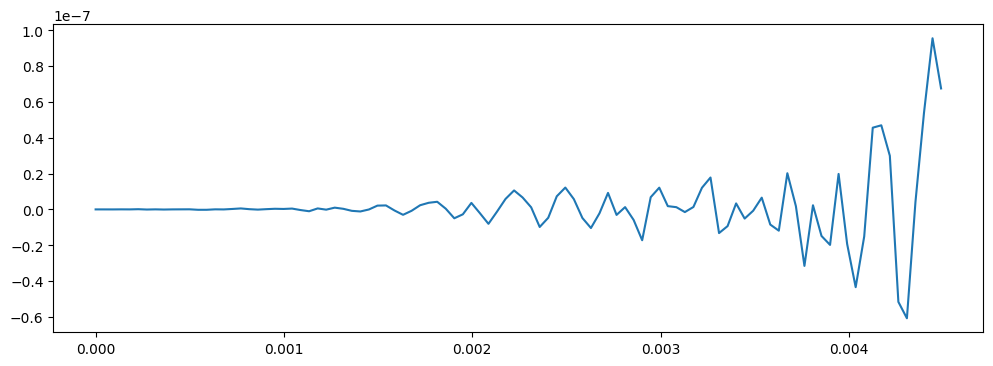

In [25]:
plt.figure(figsize=(12, 4))
plt.plot(np.arange(0,len(audio_data[:100]))/sr,audio_data[:100])
plt.show()

But with librosa we don't even need to calculate time using matplotlib and then plot it there is a function for that

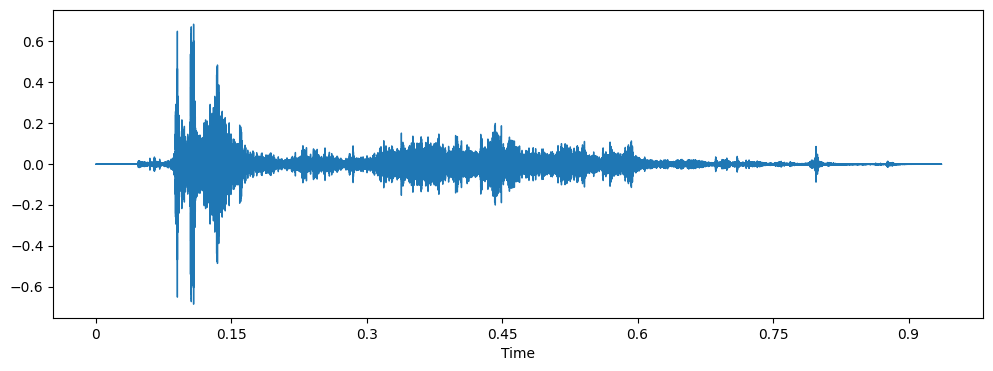

In [26]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio_data, sr=sr)
plt.show()

Sometimes, we may encounter empty data at the beginning or end of an audio file, and we might want to remove this unnecessary portion. To do that, use the following block of code.

In [27]:
audio_data_trimmed, index = librosa.effects.trim(audio_data, top_db=25)

Trim away everything that is 25 dB quieter than the loudest part of the signal

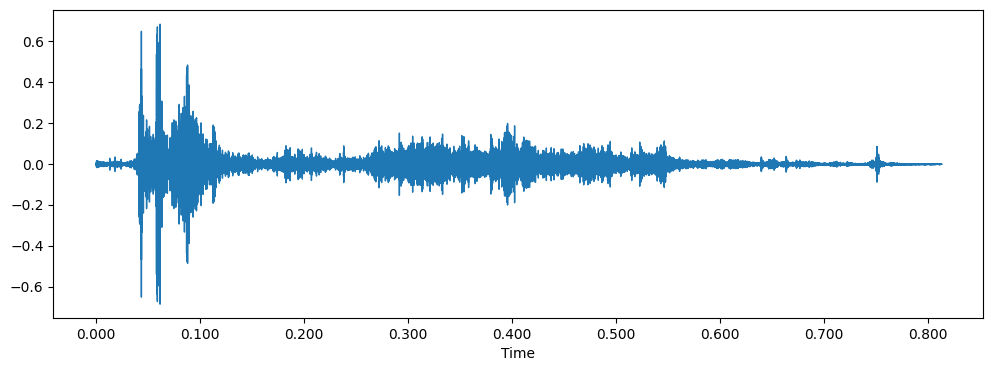

In [28]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio_data_trimmed, sr=sr)
plt.show()

Okay, we have generated images from audio, and we should train our CNNs using this data. However, there’s a problem: waveforms only give us amplitude at a particular time. What they don’t show is frequency, which plays a crucial role in how we perceive sound. This is important because two sounds with similar amplitude (loudness) but different frequencies can sound completely different, sometimes not even close.

Here come spectrograms. Unlike waveforms, spectrograms represent three quantities: frequency (since an audio signal can contain a mixture of frequencies), amplitude, and time. Here’s what one looks like

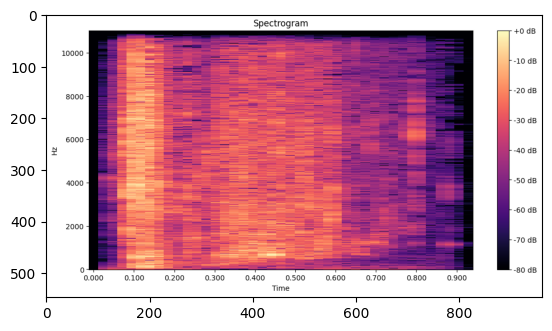

In [29]:
img = plt.imread("spectrogram.png")
plt.imshow(img)
plt.show()

Yes, it’s beautifully overwhelming to look at, but let me break it down. The x-axis shows time, while the y-axis shows frequency. As I mentioned, an audio signal can contain multiple frequencies. If you focus on a single moment in time, you’ll see many rectangular boxes stacked on top of each other. Each box represents a specific frequency, and the color indicates its amplitude: the brighter the color, the larger the amplitude. If a box is black, it means there is no signal at that frequency.

Numerically, a spectrogram is a 2-dimensional NumPy array. You might ask, "How can it be 2-dimensional if it represents three quantities?" Here's how: it has a grid-like structure

it has a grid like structure 
[[[1],[2]],
[[5],[0]]]

In this grid, the columns represent time, the rows represent frequency, and the values inside represent amplitude.

Before jumping into the code, let’s understand a few more concepts.
Fourier Transform: A mathematical technique used to extract the individual frequencies from an audio signal.

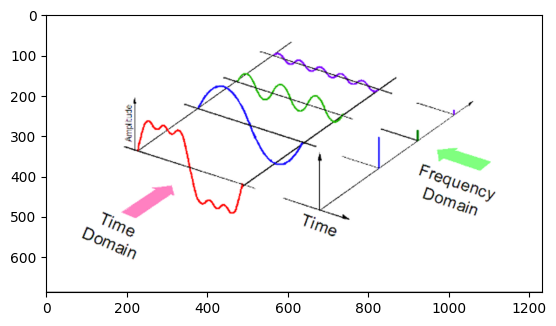

In [30]:
img = plt.imread("Fourier Transform.png")
plt.imshow(img)
plt.show()

Short-Time Fourier Transform is applying Forier Transformation in a set of short intervals

We convert the amplitude units to decibels (dB) because we don’t perceive sound linearly; instead, we hear it on a logarithmic scale. (For more details, you can watch videos explaining why the dB scale is used to measure loudness)

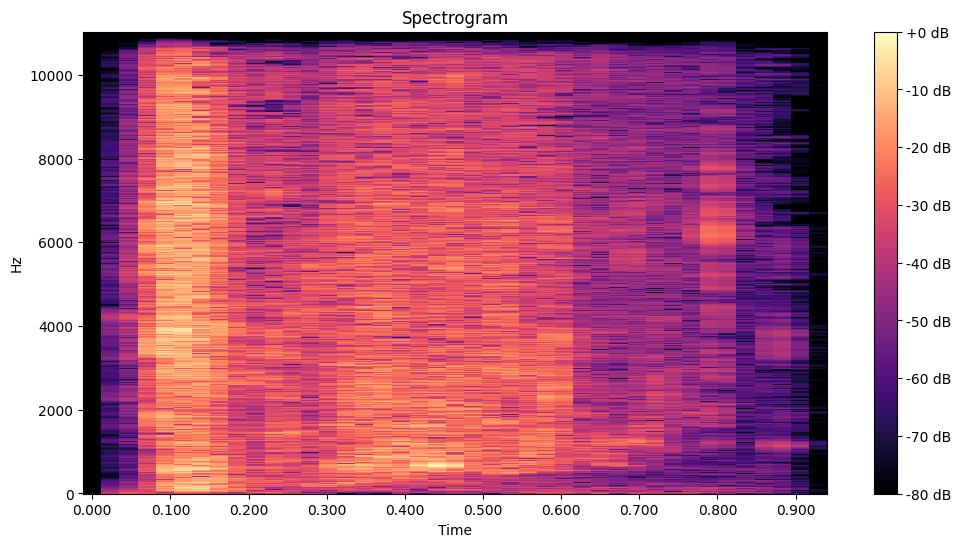

In [31]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load audio file
y, sr = librosa.load("./water_splash.mp3")  # sr = sampling rate

# Short-Time Fourier Transform (STFT)
D = np.abs(librosa.stft(y))

# Convert to decibels for better visualization
DB = librosa.amplitude_to_db(D, ref=np.max)

# Plot spectrogram
plt.figure(figsize=(12, 6))
librosa.display.specshow(DB, sr=sr, x_axis="time", y_axis="hz", cmap="magma")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram")
plt.show()

okay, this is good but we have something slightly better than normal spectrogram which is preferred over spectrogram.
Mel Spectrogram.

# Mel Spectrograms

Mel spectrograms are an improved version of regular spectrograms. To understand the difference, you need to know that human perception of frequency is not linear. For example, a 100 Hz difference at 100 Hz makes a big difference to our ears, whereas the same 100 Hz difference at 2000 Hz is much less noticeable. To account for this, we apply the Mel scale (using the Mel equation). After applying it, the spectrogram’s frequencies are more focused on the mid-range, which aligns better with human hearing.

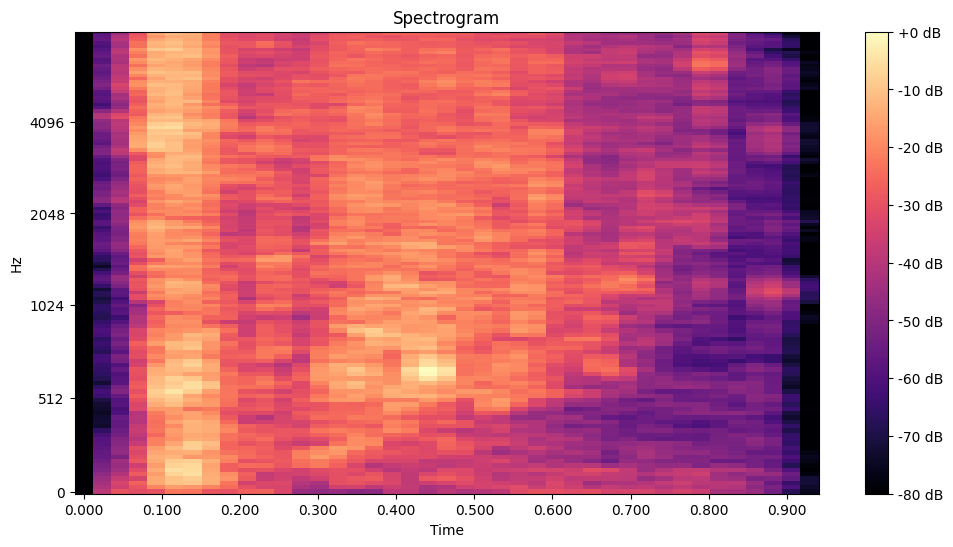

In [37]:
audio_data, sample_rate = librosa.load("./water_splash.mp3")

Spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate, n_mels=128, fmax=8000)

Spectrogram_dB = librosa.power_to_db(Spectrogram, ref=np.max)

plt.figure(figsize=(12,6))

librosa.display.specshow(Spectrogram_dB, sr=sample_rate,x_axis='time',y_axis='mel',fmax=8000)

plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram")
plt.show()